In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#needed to show plots in ipython cells
%matplotlib inline 


In [14]:
def rec_keys(fits_rec):
    return fits_rec.dtype.fields.keys()

names = ['FE_H', 'PARAM_ALPHA_M', 'MG_H']
def good_indicies(data, index=None):
    if index is not None:
        good = np.ones_like(index, dtype=bool)
        for name in names:
            good *= data[name][index] > -9999
    else:
        good = np.ones(len(data[names[0]]), dtype=bool)
        for name in names:
            good *= data[name] > -9999

    return good

In [2]:
APOGEE = fits.open('/Users/spardy/Research/data/APOGEE/allStar-v304.fits')

In [2]:
cat_all = fits.open('/Users/spardy/Google Drive/ChemicalTagging/APOGEE/allStar-v603.fits')


In [5]:
rec_keys(cat_all[1].data)

['LOGG_ERR',
 'FILE',
 'VISIT_PK',
 'MN_H_FLAG',
 'CA_H',
 'MG_H_FLAG',
 'APSTAR_VERSION',
 'ASPCAP_VERSION',
 'ASPCAPFLAG',
 'VSCATTER',
 'TARG_4_5',
 'IRAC_5_8_ERR',
 'O_H_ERR',
 'PARAM_ALPHA_M_ERR',
 'RA',
 'SYNTHVSCATTER',
 'AK_WISE',
 'RV_LOGG',
 'SYNTHVERR_MED',
 'SYNTHSCATTER',
 'STABLERV_CHI2_PROB',
 'GLON',
 'H',
 'PARAM_ALPHA_M',
 'TI_H',
 'RESULTS_VERSION',
 'LOGG',
 'VHELIO_AVG',
 'C_H_FLAG',
 'RV_AUTOFWHM',
 'IRAC_4_5_ERR',
 'STARFLAG',
 'SRC_H',
 'PM_SRC',
 'WASH_DDO51_GIANT_FLAG',
 'N_H_ERR',
 'N_H_FLAG',
 'TEFF_ERR',
 'O_H_FLAG',
 'TEFF',
 'N_H',
 'AL_H',
 'DEC',
 'IRAC_4_5',
 'MN_H',
 'TELESCOPE',
 'WASH_M',
 'ELEM',
 'NI_H',
 'IRAC_8_0_ERR',
 'ASPCAP_CLASS',
 'SNR',
 'AK_TARG',
 'FE_H',
 'S_H_FLAG',
 'FE_H_ERR',
 'SYNTHVHELIO_AVG',
 'K',
 'TARGET_ID',
 'VISITS',
 'ALL_VISIT_PK',
 'VERR_MED',
 'RV_FEH',
 'PARAM',
 'STARFLAGS',
 'ALL_VISITS',
 'V_H_FLAG',
 'PARAM_M_H_ERR',
 'PMRA',
 'FELEM',
 'PARAM_M_H',
 'MG_H',
 'IRAC_8_0',
 'TI_H_ERR',
 'WASH_DDO51_STAR_FLAG',
 'FEL

In [28]:
#APOGEE[1].data #uncomment this line to see the data names

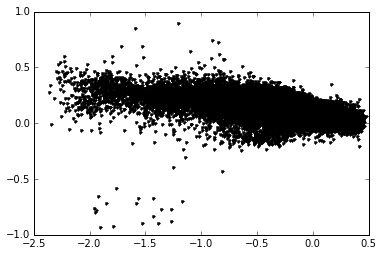

In [20]:
good = good_indicies(cat_all[1].data)
plt.plot(cat_all[1].data['FE_H'][good], cat_all[1].data['PARAM_ALPHA_M'][good], 'k.')

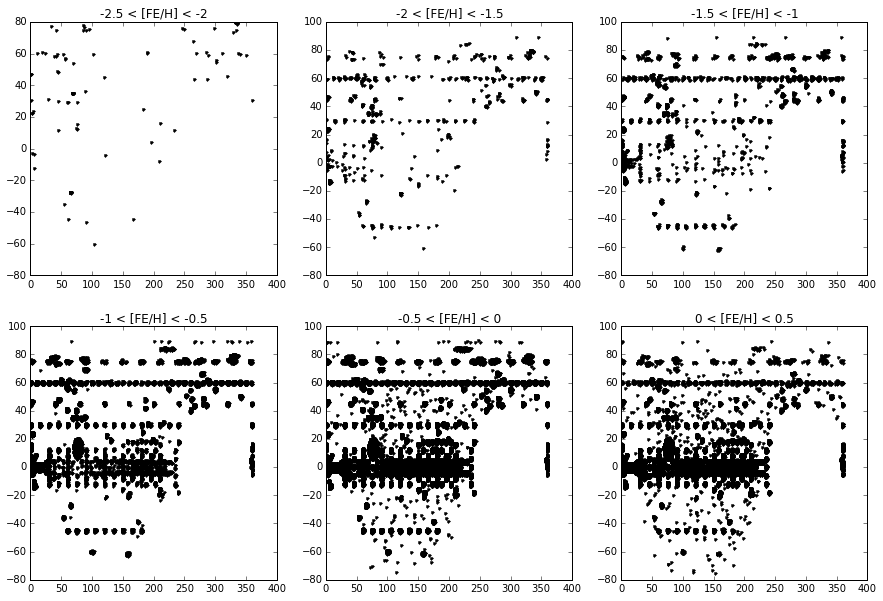

In [38]:

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()
for i, axis in enumerate(axes):
    rng = [-2.5+i*0.5,-2.5+(i+1)*0.5]
    ind = np.where((cat_all[1].data['FE_H'] > rng[0])*
                   (cat_all[1].data['FE_H'] < rng[1]))[0]
    axis.plot(cat_all[1].data['GLON'][ind],
             cat_all[1].data['GLAT'][ind], marker='.', linestyle='none',
             color='black')
    axis.set_title('{:g} < [FE/H] < {:g}'.format(*rng))

In [4]:
vel = APOGEE[1].data['VHELIO_AVG']  # Heliocentric radial velocity
v_scatter = APOGEE[1].data['VSCATTER']
v_err = APOGEE[1].data['VERR']

metals = APOGEE[1].data['METALS']  # Metallicity
metals_err = APOGEE[1].data['METALS_ERR']

good_points = np.where((metals > -1000) & (metals < 90))[0]
# Looks like we have some strange outliers...
l = APOGEE[1].data['GLON']
b = APOGEE[1].data['GLAT']

ra = APOGEE[1].data['RA']
dec = APOGEE[1].data['DEC']

(59607,)

In [9]:
def plot_coords(RA,Dec,org=0,title='Mollweide projection', projection='mollweide',
                xlabel='RA', ylabel='DEC', **kwargs):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    From: http://balbuceosastropy.blogspot.com/2013/09/the-mollweide-projection.html
    '''
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection=projection, axisbg ='LightCyan')
    ax.scatter(np.radians(x),np.radians(Dec), **kwargs)  # convert degrees to radians
    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel(xlabel)
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel(ylabel)
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)

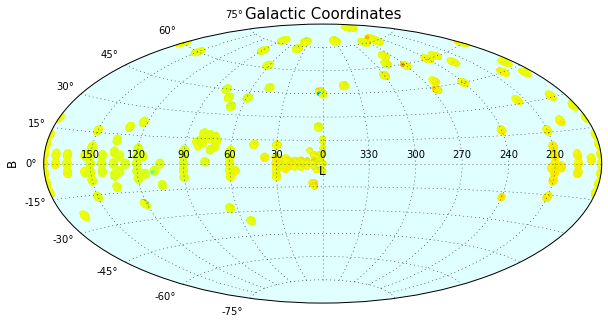

In [14]:
plot_coords(l, b, projection='aitoff', title='Galactic Coordinates', xlabel='L', ylabel='B', c=vel, lw=0)

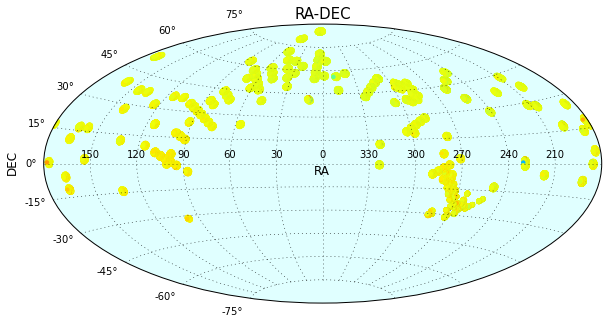

In [16]:
plot_coords(ra, dec, projection='aitoff', title='RA-DEC', xlabel='RA', ylabel='DEC', c=vel, lw=0)

###Now plot these as density

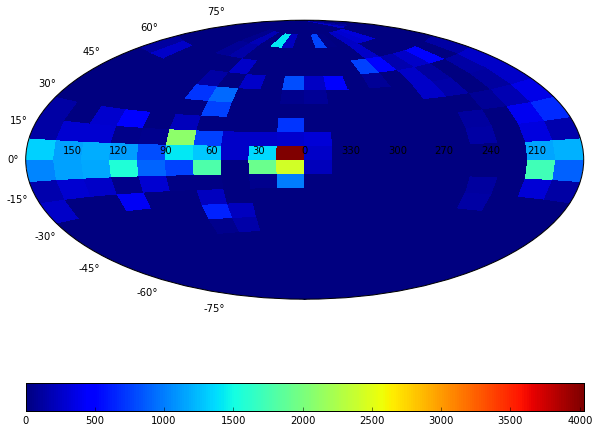

In [46]:
# USING HISTOGRAM
x = np.remainder(l+360,360) # shift RA values
ind = x>180
x[ind] -=360    # scale conversion to [-180, 180]
x=-x    # reverse the scale: East to the left

hist,xedges,yedges = np.histogram2d(b,x,bins=[20,20],range=[[-90,90],[-180,180]])
X,Y = np.meshgrid(np.radians(yedges),np.radians(xedges))

tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
tick_labels = np.remainder(tick_labels+360,360)
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(111, projection='aitoff')
axis.grid(True)
# Apparently axis.imshow doesn't work well on projections
image = axis.pcolormesh(X,Y,hist)
axis.set_xticklabels(tick_labels)     # we add the scale on the x axis
cb = fig.colorbar(image, orientation='horizontal')


In [41]:
# USING KDE (http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.gaussian_kde.html)

x = np.remainder(l+360,360) # shift RA values
ind = x>180
x[ind] -=360    # scale conversion to [-180, 180]
x=-x    # reverse the scale: East to the left

X, Y = np.mgrid[-180:180:100j, -90:90:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, b])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)



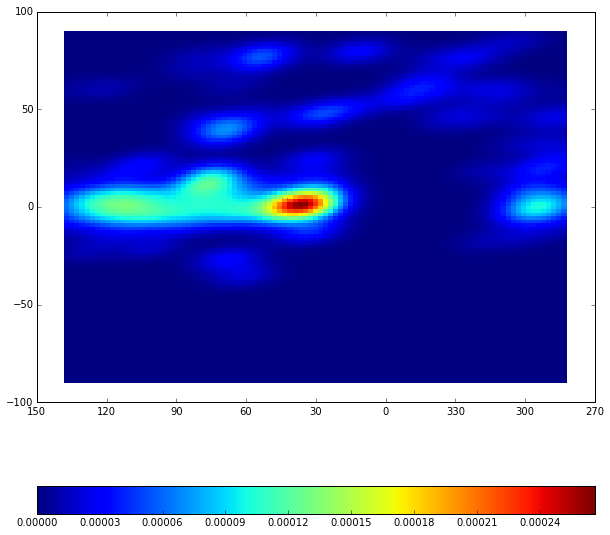

In [45]:
tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
tick_labels = np.remainder(tick_labels+360,360)
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(111)#, projection='aitoff')
axis.grid(True)
image = axis.pcolormesh(X,Y,Z)
axis.set_xticklabels(tick_labels)     # we add the scale on the x axis
cb = fig.colorbar(image, orientation='horizontal')


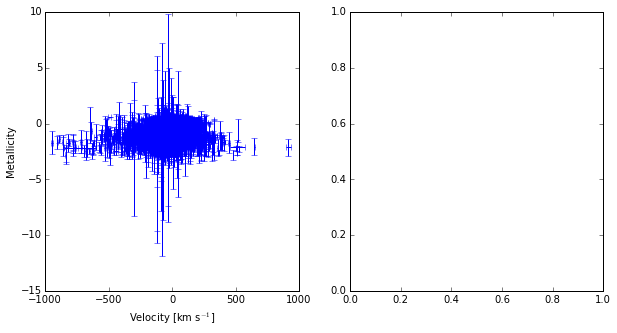

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()
axes[0].errorbar(vel[good_points], metals[good_points],
                 xerr=v_err[good_points], yerr=metals_err[good_points], color='blue', linestyle='none')
axes[0].set_xlabel('Velocity [km s$^{-1}$]')
axes[0].set_ylabel('Metallicity')